In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.barabasi_albert_graph(2000, 2)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1038
Number of deinfluenced nodes: 0
Number of susceptible nodes: 962
influencer {1665, 1412, 1540, 646, 648, 1289, 1547, 11, 1293, 142, 139, 1419, 1426, 1943, 1691, 287, 1186, 35, 1444, 1192, 300, 430, 687, 1972, 1076, 951, 1727, 963, 1092, 1606, 584, 1870, 334, 853, 1369, 1885, 737, 1253, 614, 613, 360, 1514, 1899, 364, 1898, 1134, 1390, 1132, 1653, 761}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 201))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': {1469}, 'Degree': {79}}), (3, {'Random': {1903}, 'Degree': {47}}), (4, {'Random': {1859}, 'Degree': {28}}), (5, {'Random': {928, 1445}, 'Degree': {45}}), (6, {'Random': {1382, 598, 1639}, 'Degree': {41}}), (7, {'Random': {1400, 962, 220}, 'Degree': {31}}), (8, {'Random': {339, 1358}, 'Degree': {19}}), (9, {'Random': {434, 788, 1262, 999}, 'Degree': {29}}), (10, {'Random': {1728, 513, 1916, 1673, 1756}, 'Degree': {48}}), (11, {'Random': {93, 670, 1054}, 'Degree': {3}}), (12, {'Random': {585, 1529, 1714, 1909}, 'Degree': {115}}), (13, {'Random': {1961, 265, 1033, 1897, 1325}, 'Degree': {18}}), (14, {'Random': {411, 183}, 'Degree': {16}}), (15, {'Random': {1314, 1133, 687, 215, 537}, 'Degree': {26}}), (16, {'Random': {290, 1157, 1288, 297, 1464}, 'Degree': {9}}), (17, {'Random': {1888, 837, 1735, 941, 755, 1310}, 'Degree': {9}}), (18, {'Random': {1251, 1702, 487, 1130, 1557}, 'Degree': {7}}), (19, {'Random': {1440, 1922, 1220, 1638,

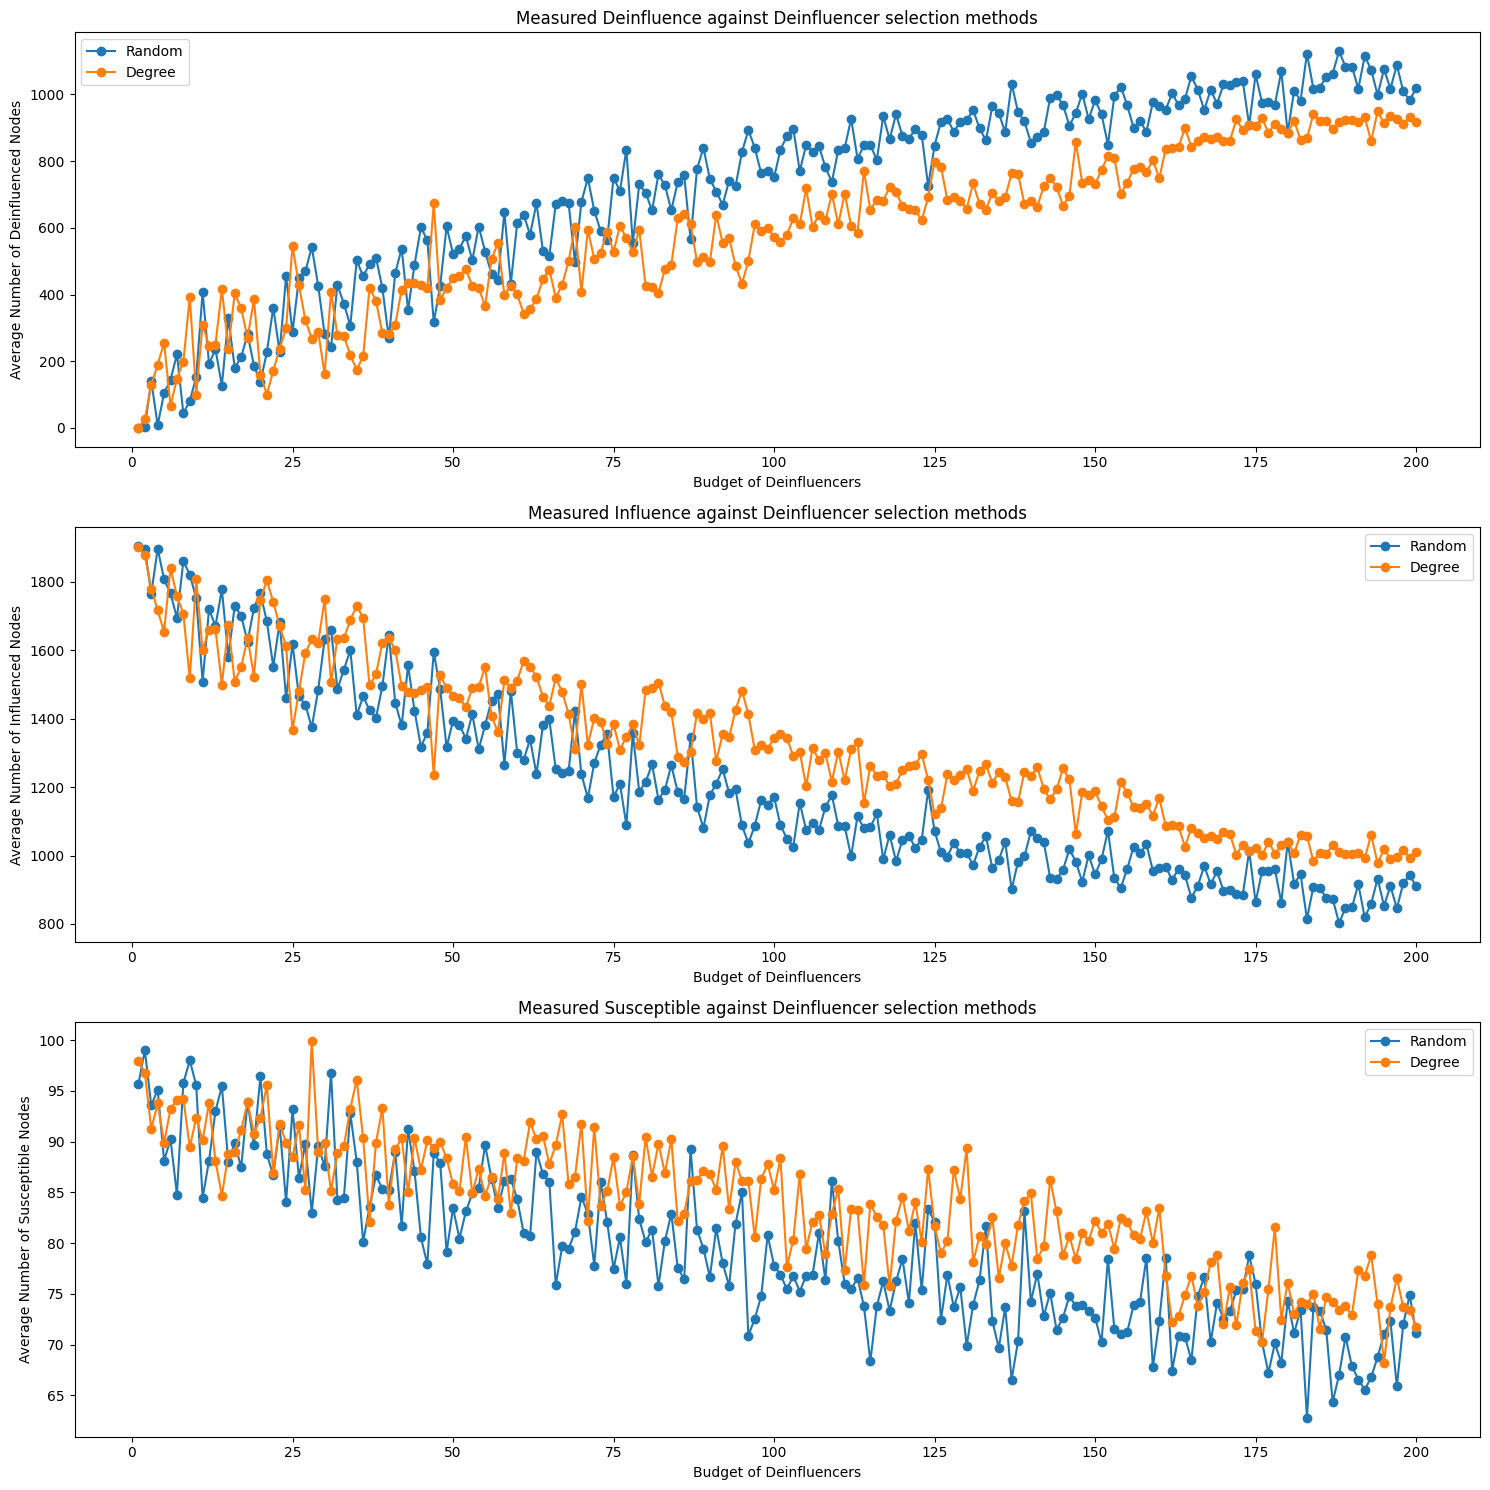

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()